In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import DataFrame

rs = 1              # Random State
folds = 10          # Quantity of folds
test_split = 0.25   # Validation

In [34]:
data = pd.read_csv('../bases/test_bases/darwins.csv')

data.head(5)

,ID,air_time1,disp_index1,gmrt_in_air1,gmrt_on_paper1,max_x_extension1,max_y_extension1,mean_acc_in_air1,mean_acc_on_paper1,mean_gmrt1,...,mean_jerk_in_air25,mean_jerk_on_paper25,mean_speed_in_air25,mean_speed_on_paper25,num_of_pendown25,paper_time25,pressure_mean25,pressure_var25,total_time25,class
0,id_1,5160,0.000013,120.804174,86.853334,957,6601,0.361800,0.217459,103.828754,...,0.141434,0.024471,5.596487,3.184589,71,40120,1749.278166,296102.7676,144605,P
1,id_2,51980,0.000016,115.318238,83.448681,1694,6998,0.272513,0.144880,99.383459,...,0.049663,0.018368,1.665973,0.950249,129,126700,1504.768272,278744.2850,298640,P
2,id_3,2600,0.000010,229.933997,172.761858,2333,5802,0.387020,0.181342,201.347928,...,0.178194,0.017174,4.000781,2.392521,74,45480,1431.443492,144411.7055,79025,P
3,id_4,2130,0.000010,369.403342,183.193104,1756,8159,0.556879,0.164502,276.298223,...,0.113905,0.019860,4.206746,1.613522,123,67945,1465.843329,230184.7154,181220,P
4,id_5,2310,0.000007,257.997131,111.275889,987,4732,0.266077,0.145104,184.636510,...,0.121782,0.020872,3.319036,1.680629,92,37285,1841.702561,158290.0255,72575,P


In [35]:
df = data.drop('ID', axis=1)

In [36]:
feature_names = df.columns.to_list()
feature_names

['air_time1',
 'disp_index1',
 'gmrt_in_air1',
 'gmrt_on_paper1',
 'max_x_extension1',
 'max_y_extension1',
 'mean_acc_in_air1',
 'mean_acc_on_paper1',
 'mean_gmrt1',
 'mean_jerk_in_air1',
 'mean_jerk_on_paper1',
 'mean_speed_in_air1',
 'mean_speed_on_paper1',
 'num_of_pendown1',
 'paper_time1',
 'pressure_mean1',
 'pressure_var1',
 'total_time1',
 'air_time2',
 'disp_index2',
 'gmrt_in_air2',
 'gmrt_on_paper2',
 'max_x_extension2',
 'max_y_extension2',
 'mean_acc_in_air2',
 'mean_acc_on_paper2',
 'mean_gmrt2',
 'mean_jerk_in_air2',
 'mean_jerk_on_paper2',
 'mean_speed_in_air2',
 'mean_speed_on_paper2',
 'num_of_pendown2',
 'paper_time2',
 'pressure_mean2',
 'pressure_var2',
 'total_time2',
 'air_time3',
 'disp_index3',
 'gmrt_in_air3',
 'gmrt_on_paper3',
 'max_x_extension3',
 'max_y_extension3',
 'mean_acc_in_air3',
 'mean_acc_on_paper3',
 'mean_gmrt3',
 'mean_jerk_in_air3',
 'mean_jerk_on_paper3',
 'mean_speed_in_air3',
 'mean_speed_on_paper3',
 'num_of_pendown3',
 'paper_time3',
 'p

<Axes: xlabel='class', ylabel='count'>

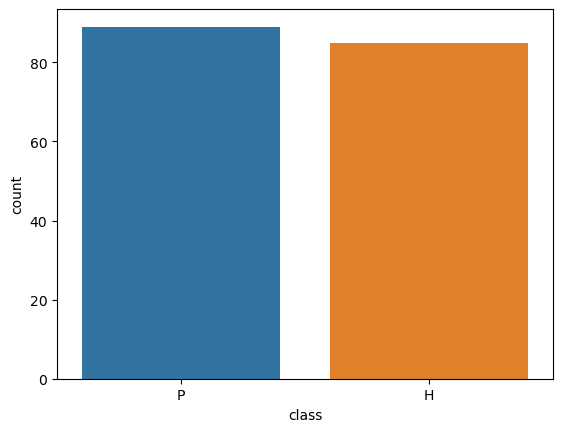

In [37]:
sns.countplot(x="class", data= df)

In [40]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold

X = df.drop(columns="class", axis=1).values
y = df['class'].map({'P': 1, 'H': 0}).values
#y = data['Bankrupt?'].values
#feature_names.remove("class")

std = StandardScaler()
X = std.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= test_split, random_state=rs)

kfold = StratifiedKFold(n_splits= folds, random_state= rs, shuffle=True)

In [41]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [42]:
import pickle

data = {
    'X': X,
    'y': y,
    'feature_names': feature_names
}

# Save the dictionary with preprocessed data and feature_names
with open('tests/darwin.pkl', 'wb') as f:
    pickle.dump(data, f)